# Import

In [56]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
# HTML(style)

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
from sklearn.model_selection import train_test_split

# Reading

In [60]:
animals = pd.read_csv("dogs_n_cats.csv")

In [61]:
animals.isnull().sum()

Length    0
Height    0
Fur       0
Bark      0
Climb     0
Type      0
dtype: int64

In [62]:
animals

,Length,Height,Fur,Bark,Climb,Type
0,15,18.0,1,1,0,sweet_dog
1,20,24.0,1,0,0,sweet_dog
2,34,40.8,1,1,0,sweet_dog
3,26,31.2,1,1,0,sweet_dog
4,16,19.2,1,1,0,sweet_dog
...,...,...,...,...,...,...
995,8,3.2,1,0,1,cat
996,7,2.8,1,0,1,cat
997,6,2.4,1,0,1,cat
998,7,2.8,1,0,1,cat


In [64]:
y = pd.get_dummies(animals.Type).sweet_dog

In [65]:
X = animals.drop(["Type"], axis = 1)

In [66]:
X

,Length,Height,Fur,Bark,Climb
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: sweet_dog, Length: 1000, dtype: uint8

In [68]:
scores_data = pd.DataFrame()

In [81]:
X_train, X_test, y_train, y_test =  train_test_split(X, 
                                                     y, 
                                                     test_size=0.30)

In [83]:
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                      max_depth=max_depth)
    # 1
    clf.fit(X_train, y_train)
    # train
    train_score = clf.score(X_train, y_train)
    # test
    test_score = clf.score(X_test, y_test)
    
    # 2
    mean_cross_val_score = cross_val_score(clf, X, y).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [84]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', 
                           value_name='score')

In [85]:
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                      max_depth=1)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

<AxesSubplot:xlabel='max_depth', ylabel='score'>

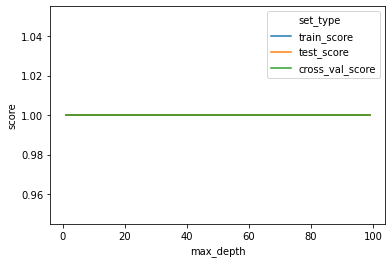

In [86]:
sns.lineplot(x="max_depth", 
             y="score", 
             hue="set_type", 
             data=scores_data_long)

# Predict

In [87]:
test = pd.read_json("a.json")

In [88]:
test

,Length,Height,Fur,Bark,Climb
0,25,30.0,1,1,0
1,34,40.8,1,1,0
2,33,39.6,1,1,0
3,34,40.8,1,1,0
4,28,33.6,1,1,0
...,...,...,...,...,...
95,5,2.0,1,0,1
96,11,4.4,1,0,1
97,7,2.8,1,0,1
98,7,2.8,1,0,1


In [92]:
clf.predict(test).sum()

46

46 dogs predicted in json data